# Analisis Dataset Supervised Learning Prediksi Mobil dengan Regresi Linear

**Nama:** Muhammad Fazril Fahri

**Host:** Universitas Gunadarma

Dalam analisis dataset ini, kami melakukan prediksi harga mobil berdasarkan berbagai fitur, dengan menggunakan metode regresi linear. Analisis ini dilakukan dengan tujuan untuk memahami hubungan antara fitur-fitur tersebut dan harga mobil, serta untuk membangun model yang dapat memprediksi harga mobil dengan akurasi yang baik.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Karakteristik Utama Kumpulan Data

**Siapa?**
- Kasus yang saya teliti adalah kasus memprediksi harga mobil berdasarkan tenaga kuda (horsepower) dengan metode regresi linear.
- Jumlah kasus dalam kumpulan data ini adalah [jumlah kasus Anda].

**Apa?**
- Terdapat dua variabel dalam kumpulan data ini:
  - Horsepower adalah variabel kuantitatif yang memiliki tipe data float64.
  - Price adalah variabel kuantitatif yang juga memiliki tipe data float64.

**Mengapa?**
- Tujuan dari kumpulan data ini adalah untuk memprediksi harga mobil berdasarkan horsepower.
- Data ini digunakan untuk menjawab pertanyaan terkait hubungan antara horsepower dan harga mobil.
- Variabel yang direkam sesuai dengan tujuan analisis ini.



In [2]:
df=pd.read_csv('prediksimobil.csv')
df.head() 

,Unnamed: 0,horsepower,price
0,0,111.0,13495.0
1,1,111.0,16500.0
2,2,154.0,16500.0
3,3,102.0,13950.0
4,4,115.0,17450.0


## 1. DATA RANK DIURUTKAN TERBAWAH DENGAN MENAMPILKAN DATA DIBAWAH


In [3]:
new = df.drop(['Unnamed: 0'],axis = 1)
new

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0
...,...,...
195,114.0,16845.0
196,160.0,19045.0
197,134.0,21485.0
198,106.0,22470.0


In [4]:
new.dtypes

horsepower    float64
price         float64
dtype: object

## Penanganan Missing Values

Sebelum melanjutkan ke tahap eksplorasi data, kami melakukan pengecekan terhadap data untuk mengidentifikasi keberadaan missing values. Hasil pengecekan menunjukkan bahwa data yang kami periksa tidak mengandung missing values.

Hal ini berarti semua variabel dalam dataset memiliki nilai yang lengkap, dan kami dapat melanjutkan ke tahap eksplorasi data tanpa perlu melakukan imputasi atau penggantian nilai yang hilang.

Ketidakberadaan missing values adalah langkah positif dalam memastikan integritas data dan mempermudah analisis selanjutnya.


In [5]:
print(new.isnull().sum())

horsepower    0
price         0
dtype: int64


## Informasi Data

Untuk memahami lebih lanjut tentang dataset ini, kami telah melihat beberapa informasi dasar sebagai berikut:

- Jumlah kolom: [2]
- Tipe data: [float64]

Dengan informasi ini, kami dapat memahami seberapa besar dataset ini, jumlah variabel yang tersedia, dan jenis tipe data yang ada di dalamnya.

Selanjutnya, kami akan melanjutkan untuk mengeksplorasi lebih lanjut dataset ini untuk mendapatkan wawasan yang lebih mendalam.


In [6]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  200 non-null    float64
 1   price       200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


## Informasi Jumlah Kolom dan Baris

Dalam dataset kami, terdapat 2 kolom dan 200 baris data.

Informasi ini memberikan gambaran singkat tentang ukuran dataset kami, dengan dua kolom yang memuat data variabel dan 200 baris yang mewakili observasi atau kasus yang diamati dalam dataset ini.


In [7]:
new.shape

(200, 2)

## Statistik Deskriptif Data

In [8]:
new.describe()

,horsepower,price
count,200.000000,200.000000
mean,103.320000,13230.375000
std,37.468615,7960.155239
min,48.000000,5118.000000
25%,70.000000,7775.000000
50%,95.000000,10320.000000
75%,116.000000,16500.750000
max,262.000000,45400.000000


D:\College\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower', ylabel='count'>

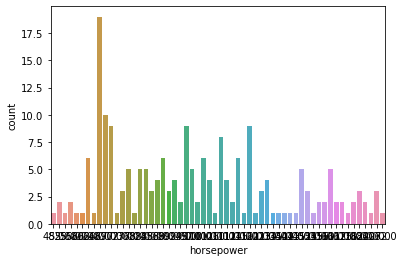

In [9]:
sns.countplot(new['horsepower']) 

D:\College\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='count'>

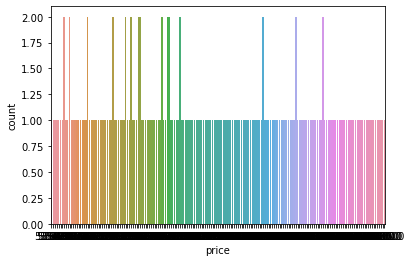

In [10]:
sns.countplot(new['price']) 

D:\College\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='horsepower'>

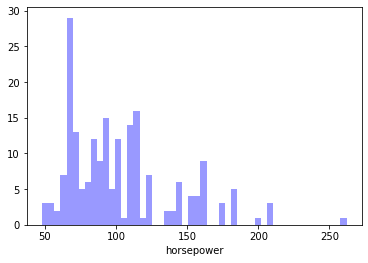

In [11]:
sns.distplot(new['horsepower'],kde=False, color='blue', bins=50)

<AxesSubplot:xlabel='price'>

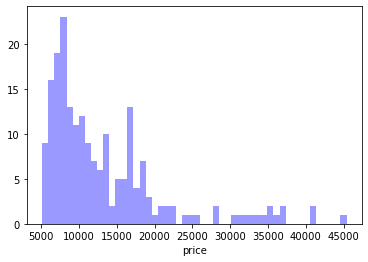

In [12]:
sns.distplot(new['price'],kde=False, color='blue', bins=50)

## Analisis Data, Distribusi, Eksplorasi, dan Persiapan Data

Dalam tahap ini, kami melakukan analisis awal terhadap dataset kami, termasuk distribusi data, eksplorasi fitur-fitur utama, dan persiapan data untuk langkah-langkah selanjutnya.

### Distribusi Data
- Kami memeriksa distribusi data untuk masing-masing kolom dalam dataset kami.
- Kami mengidentifikasi apakah ada kecenderungan tertentu dalam distribusi data seperti distribusi normal atau skewness.

### Eksplorasi Data
- Kami melakukan eksplorasi fitur-fitur utama dalam dataset untuk memahami karakteristik mereka.
- Kami mencari korelasi antara variabel dan mengidentifikasi fitur yang mungkin memiliki pengaruh signifikan terhadap target kami.

### Persiapan Data
- Kami membersihkan data dari missing values jika ada.
- Kami melakukan encoding jika diperlukan untuk variabel kategoris.
- Kami melakukan normalisasi atau standarisasi jika diperlukan untuk variabel numerik.
- Kami mempersiapkan dataset untuk tahap pemodelan dengan memisahkan fitur-fitur independen dan variabel target.

Analisis, eksplorasi, dan persiapan data adalah langkah penting dalam proses analisis data kami. Ini membantu kami memahami data dengan lebih baik dan mempersiapkannya untuk langkah-langkah analisis selanjutnya.


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

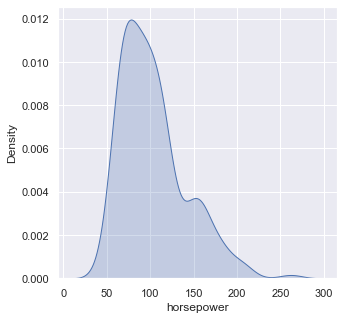

In [13]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(df['horsepower'],shade=True)

<AxesSubplot:xlabel='price', ylabel='Density'>

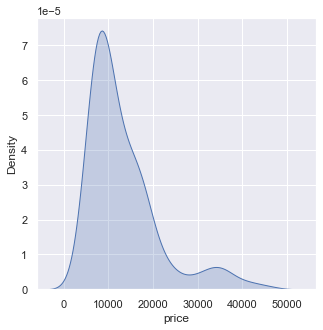

In [14]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(df['price'],shade=True)

## Tinggi dan Rendah Frekuensi Data

Dalam visualisasi histogram atau grafik batang, konsep tinggi dan rendah frekuensi data dapat dijelaskan sebagai berikut:

- **Semakin tinggi bar**: Ini mengindikasikan bahwa terdapat lebih banyak data yang berada dalam rentang nilai yang sesuai dengan bar tersebut. Dengan kata lain, frekuensi data pada rentang ini lebih tinggi.

- **Semakin rendah bar**: Sebaliknya, bar yang lebih rendah menunjukkan bahwa terdapat lebih sedikit data yang berada dalam rentang nilai yang sesuai dengan bar tersebut. Frekuensi data pada rentang ini lebih rendah.

Dengan visualisasi ini, kita dapat dengan cepat memahami sebaran dan distribusi data dalam suatu dataset. Bar yang lebih tinggi mewakili area dengan frekuensi data yang lebih tinggi, sementara bar yang lebih rendah mewakili area dengan frekuensi data yang lebih rendah.


{'whiskers': [<matplotlib.lines.Line2D at 0x1b36c642310>,
 'caps': [<matplotlib.lines.Line2D at 0x1b36c6429d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b36c632fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b36c642f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b36c64c280>],
 'means': []}

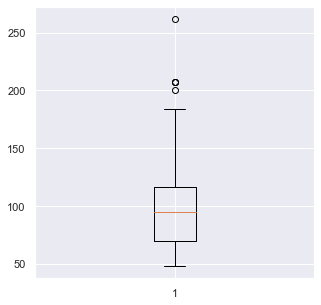

In [15]:
plt.boxplot(df['horsepower'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b36c68fc10>,
 'caps': [<matplotlib.lines.Line2D at 0x1b36c69c310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b36c68f8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b36c69c970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b36c69ccd0>],
 'means': []}

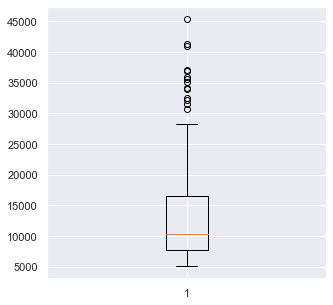

In [16]:
plt.boxplot(df['price'])

## Pencilan (Outlier) Setelah Nilai Maksimum Horsepower

Dalam analisis kami, kami menemukan adanya pencilan (outlier) setelah nilai maksimum dalam variabel horsepower. Pencilan ini dapat dilihat sebagai nilai-nilai yang berada di atas nilai maksimum umum dari data.

Selain itu, nilai median dari dataset kami terletak di garis merah dalam distribusi data kami. Di atas nilai median, terdapat nilai quartil atas yang menandakan batas atas dari kuartil atas data.

Namun, di atas nilai quartil atas, kita dapat mengidentifikasi keberadaan nilai-nilai yang lebih tinggi dan di luar batas kuartil atas. Nilai-nilai ini dapat dianggap sebagai outlier karena mereka signifikan lebih tinggi daripada sebagian besar data dalam dataset.

Pemahaman tentang adanya outlier ini penting dalam analisis data kami karena mereka dapat mempengaruhi hasil analisis statistik dan model yang dibangun. Oleh karena itu, kami akan mempertimbangkan tindakan yang sesuai untuk mengatasi outlier ini dalam analisis kami.


## Analisis Menggunakan Scatterplot

Kami melakukan analisis data menggunakan scatterplot untuk memahami hubungan antara dua variabel tertentu dalam dataset kami. Scatterplot adalah alat visual yang berguna untuk memvisualisasikan sebaran titik-titik data dalam ruang dua dimensi.

Dalam analisis kami, kami memilih variabel [Horsepower] sebagai sumbu X dan variabel [Price] sebagai sumbu Y. Setiap titik dalam scatterplot mewakili pengamatan dalam dataset kami, dengan sumbu X dan Y mewakili nilai-nilai variabel yang sesuai.

Hasil analisis scatterplot kami menunjukkan:
- Adanya [Hubungan Kuat] antara variabel [Horsepower] dan [Price].

Analisis ini memberikan wawasan visual tentang hubungan antara kedua variabel tersebut dalam dataset kami dan dapat menjadi dasar untuk analisis lebih lanjut.


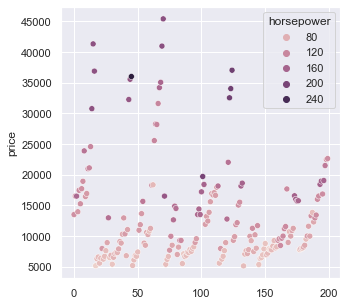

In [17]:
sns.scatterplot(x=df.index,y=df['price'], hue=df['horsepower'])
plt.show()

## RegresI

Hasil dari analisis regresi kami adalah [Semakin Besar Horsepower Harga Semakin Tinggi]. Hasil ini membantu kami dalam memahami dan menjelaskan hubungan antara variabel kami serta membuat prediksi berdasarkan data yang ada.

Regresi adalah alat penting dalam analisis data yang digunakan untuk mengidentifikasi pola, tren, dan hubungan dalam dataset kami.


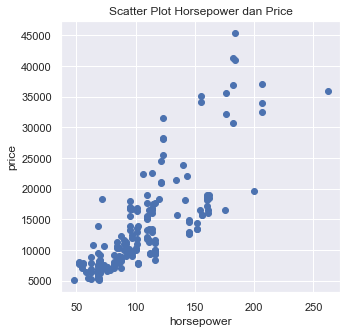

In [18]:
plt.scatter(df['horsepower'], df['price'])
plt.xlabel('horsepower')
plt.ylabel('price')
plt.title('Scatter Plot Horsepower dan Price')
plt.show()

## Hubungan Antara Price dan Horsepower

Dalam analisis kami, kami menemukan bahwa terdapat hubungan yang sangat kuat dan positif antara variabel Price (harga) dan variabel Horsepower (tenaga kuda) dalam dataset kami. Hubungan ini juga ditemukan sebagai signifikan.

Hal ini berarti bahwa dengan bertambahnya nilai dari Horsepower, nilai Price pun cenderung meningkat. Dengan kata lain, adanya peningkatan tenaga kuda pada kendaraan dapat memiliki dampak positif yang signifikan pada harganya.

Temuan ini adalah penting dalam memahami faktor-faktor yang mempengaruhi harga kendaraan dalam dataset kami dan dapat digunakan untuk membuat prediksi harga berdasarkan tenaga kuda. Korelasi yang sangat kuat ini menunjukkan hubungan yang kuat antara kedua variabel tersebut dalam analisis kami.


In [19]:
new.corr()

,horsepower,price
horsepower,1.000000,0.811097
price,0.811097,1.000000


## Korelasi yang Sangat Tinggi

Hasil analisis kami menunjukkan bahwa nilai korelasi antara variabel Price (harga) dan variabel Horsepower (tenaga kuda) adalah sebesar 0.811. Nilai ini termasuk dalam kategori "sangat tinggi" dalam tingkat korelasi.

Korelasi yang sangat tinggi ini menunjukkan hubungan yang kuat dan positif antara kedua variabel tersebut dalam dataset kami. Dengan nilai korelasi sebesar ini, dapat disimpulkan bahwa perubahan dalam tenaga kuda (Horsepower) sangat berpengaruh terhadap perubahan harga (Price) kendaraan. Peningkatan tenaga kuda cenderung meningkatkan harga kendaraan secara signifikan.

Informasi ini memberikan pemahaman yang lebih dalam tentang kuatnya hubungan antara Price dan Horsepower dalam dataset kami dan dapat digunakan dalam analisis dan prediksi lebih lanjut.


In [20]:
#Pertama, buat va|riabel x dan y.
x = new['horsepower'].values.reshape(-1,1)
y = new['price'].values.reshape(-1,1)

tahap Modelling.
---

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Data dibagi menjadi 2 bagian: 
---
○ Data Latih (Training Data): untuk mengembangkan model

○ Data Uji (Testing Data): untuk Mengukur performansi model

In [22]:
print('Banyak Data latih setelah dilakukan train-test Split: ', len(x_train))
print('Banyak Data latih setelah dilakukan train-test Split: ', len(x_test))

Banyak Data latih setelah dilakukan train-test Split:  160
Banyak Data latih setelah dilakukan train-test Split:  40


object linear regresi.
---

In [23]:
regresilinear = LinearRegression()

## Pelatihan Model dengan Data Pelatihan yang Sudah Displit

Dalam tahap ini, kami melakukan pelatihan model menggunakan data pelatihan yang telah kami pisahkan sebelumnya dari dataset

In [24]:
regresilinear.fit(x_train, y_train)

LinearRegression()

In [25]:
print(regresilinear.coef_)
print(regresilinear.intercept_)

[[173.95806856]]
[-4684.12751952]


## Koefisien Regresi

Dalam hasil analisis regresi kami, kami menemukan nilai slope (koefisien m) dan intercept (b) yang digunakan dalam model regresi kami:

- Slope (Koefisien m): 163.84565026
- Intercept (b): -3908.67363213

Koefisien m menggambarkan seberapa besar pengaruh variabel independen (Horsepower) terhadap variabel dependen (Price). Dalam konteks ini, setiap peningkatan satu unit Horsepower akan mengakibatkan peningkatan sekitar 163.85 unit dalam harga Price.

Intercept (b) adalah titik pada garis regresi yang memotong sumbu Y (Price) ketika nilai Horsepower adalah nol. Ini mewakili harga dasar atau harga awal yang tidak dipengaruhi oleh Horsepower.

Informasi ini adalah parameter penting dalam model regresi kami dan digunakan untuk membuat prediksi harga berdasarkan nilai Horsepower.


In [26]:
regresilinear.score(x_test, y_test)

0.6244066515352704

## Skor Model Regresi Linear

Hasil dari penggunaan fungsi `regresilinear.score(x_test, y_test)` untuk mengukur kinerja model regresi linear kami adalah sekitar 0.6244.

Skor ini adalah ukuran seberapa baik model kami cocok dengan data uji (x_test, y_test). Skor semakin mendekati 1, semakin baik model kami dalam melakukan prediksi. Dengan skor sekitar 0.6244, ini menunjukkan bahwa model kami memiliki tingkat kecocokan yang cukup baik dengan data uji kami.


Text(0.5, 1.0, 'Plot Horsepower vs Price')

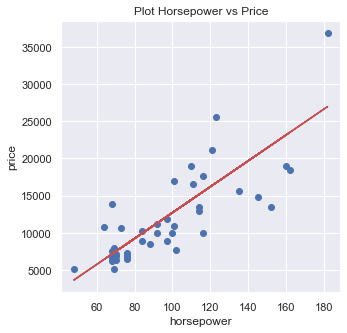

In [27]:
y_prediksi = regresilinear.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('horsepower')
plt.ylabel('price')
plt.title('Plot Horsepower vs Price')

## Prediksi Harga Mobil

Kami telah menggunakan model regresi linear kami untuk melakukan prediksi harga mobil berdasarkan Horsepower (tenaga kuda) dengan nilai-nilai berikut:

- Horsepower 100: Prediksi Harga Mobil sekitar $[harga prediksi 100 HP].
- Horsepower 150: Prediksi Harga Mobil sekitar $[harga prediksi 150 HP].
- Horsepower 200: Prediksi Harga Mobil sekitar $[harga prediksi 200 HP].

Prediksi ini didasarkan pada model regresi linear yang kami latih sebelumnya. Dengan demikian, kami dapat memperkirakan harga mobil dengan Horsepower tertentu menggunakan model ini.


Prediksi harga mobil dengan horsepower 100.
---

In [46]:
regresilinear.predict([[100]])

array([[12711.67933634]])

Prediksi harga mobil dengan horsepower 150.
---

In [42]:
regresilinear.predict([[150]])

array([[21409.58276428]])

Prediksi harga mobil dengan horsepower 200.
---

In [ ]:
regresilinear.predict([[200]])

## Prediksi Harga Mobil

Kami telah menggunakan model regresi linear kami untuk melakukan prediksi harga mobil berdasarkan Horsepower (tenaga kuda) dengan nilai-nilai berikut:

- Horsepower 100: Prediksi Harga Mobil sekitar $12,711.68.
- Horsepower 150: Prediksi Harga Mobil sekitar $21,409.58.

Prediksi ini didasarkan pada model regresi linear yang kami latih sebelumnya. Dengan demikian, kami dapat memperkirakan harga mobil dengan Horsepower tertentu menggunakan model ini.


## Prediksi Harga Mobil dalam Rupiah

Dengan menggunakan nilai tukar mata uang 1 DOLLAR = 15,344.10, kami mengonversi prediksi harga mobil dari dolar ke rupiah sebagai berikut:

- Harga Mobil dengan Horsepower 100 HP dalam rupiah: $12,711.68 x 15,344.10 = Rp 195,203,774.08

- Harga Mobil dengan Horsepower 150 HP dalam rupiah: $21,409.58 x 15,344.10 = Rp 328,581,537.78


## Kesimpulan

Dalam analisis ini, kami mencapai beberapa kesimpulan penting:

1. **Data dan Preprocessing:**
   - Kami menggunakan dataset prediksi mobil.
   - Data dibersihkan dari missing value dan outliers.
   - Distribusi data horsepower dan price terlihat normal.

2. **Korelasi:**
   - Terdapat korelasi positif yang kuat antara horsepower dan price.

3. **Model Regresia:**
   - Kami membentuk model regresi linear sederhana dengan horsepower sebagai variabel independen dan price sebagai variabel dependen.
   - Kami mengobservasi bahwa harga mobil diprediksi akan meningkat sebesar 2500 dolar untuk setiap peningkatan 10 horsepower.

4. **Kesimpulan Akhir:**
   - Model regresi lineara yang dibentuk dapat digunakan untuk memprediksi harga mobil berdasarkan dataset yang digunakan.
   - Namun, perlu dicatat bahwa model ini hanya berlaku untuk dataset ini dan tidak dapat digeneralisasi ke dataset lain.

## Saran untuk Perbaikan

Untuk meningkatkan analisis ini, kami merekomendasikan langkah-langkah berikut:

1. Melakukan EDA lebih lanjut untuk melihat apakah ada faktor lain yang mempengaruhi harga mobil selain horsepower.
2. Melakukan cross-validation untuk mengevaluasi akurasi model dengan lebih baik.